Bài toán nhóm cần giải quyết là dự đoán `humidity` của ngày hôm sau dựa vào dữ liệu của các ngày hôm trước  
Mô hình nhóm chọn là: `Linear Regression`, `MLPRegressor`  
Phương pháp đánh giá nhóm chọn là: `mean_absolute_error`

## 1. Import các thư viện cần thiết

In [29]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

## 2. Load data

In [30]:
data_df = pd.read_csv('Data/weather.csv')
data_df

,time,temperature,apparentTemperature,dewPoint,humidity,pressure,windSpeed,windBearing,cloudCover,uvIndex,visibility
0,1262304000,73.45,75.07,72.69,0.97,1010.3,6.72,71.0,0.50,0.0,NaN
1,1262390400,71.67,72.95,69.81,0.94,1011.0,2.29,41.0,0.44,0.0,4.974
2,1262476800,75.25,76.89,73.39,0.94,1011.6,1.16,30.0,0.75,0.0,4.346
3,1262563200,75.25,76.64,71.61,0.88,1010.9,3.46,71.0,0.75,0.0,6.216
4,1262649600,75.25,76.89,73.39,0.94,1010.1,6.91,120.0,0.44,0.0,6.216
...,...,...,...,...,...,...,...,...,...,...,...
725,1324944000,71.67,72.95,69.81,0.94,1012.0,4.61,0.0,0.75,0.0,5.591
726,1325030400,73.45,75.18,73.39,1.00,1013.7,4.61,11.0,0.75,0.0,3.108
727,1325116800,71.67,72.44,66.21,0.83,1012.8,2.29,11.0,0.44,0.0,6.216
728,1325203200,73.45,74.65,69.81,0.88,1012.4,4.61,0.0,0.44,0.0,6.216


**Visualize cột humidity**

In [31]:
data_df.humidity.describe()

count    730.000000
mean       0.911233
std        0.083330
min        0.610000
25%        0.840000
50%        0.940000
75%        1.000000
max        1.000000
Name: humidity, dtype: float64

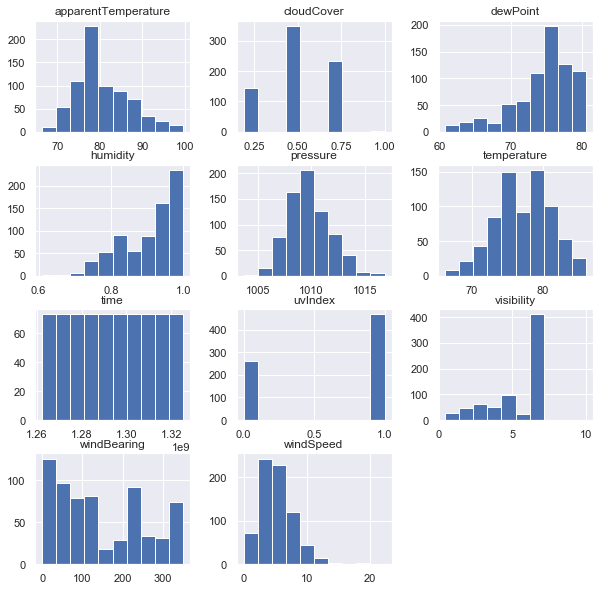

In [32]:
sns.set()
data_df.hist(figsize=(10,10))
plt.show()

## 3. Tách data thành ba tập train, test và validation với tỉ lệ 6:2:2



In [33]:
# Lấy output và chỉ lấy 729 phần tử sau
y_data = data_df["humidity"].copy()
y_data = y_data[1:]
y_data

1      0.94
2      0.94
3      0.88
4      0.94
5      0.88
       ... 
725    0.94
726    1.00
727    0.83
728    0.88
729    0.94
Name: humidity, Length: 729, dtype: float64

In [34]:
# Xóa dòng cuối cùng trong data_df vì dòng này không có output
X_data = data_df.drop(index=729).copy()
X_data

,time,temperature,apparentTemperature,dewPoint,humidity,pressure,windSpeed,windBearing,cloudCover,uvIndex,visibility
0,1262304000,73.45,75.07,72.69,0.97,1010.3,6.72,71.0,0.50,0.0,NaN
1,1262390400,71.67,72.95,69.81,0.94,1011.0,2.29,41.0,0.44,0.0,4.974
2,1262476800,75.25,76.89,73.39,0.94,1011.6,1.16,30.0,0.75,0.0,4.346
3,1262563200,75.25,76.64,71.61,0.88,1010.9,3.46,71.0,0.75,0.0,6.216
4,1262649600,75.25,76.89,73.39,0.94,1010.1,6.91,120.0,0.44,0.0,6.216
...,...,...,...,...,...,...,...,...,...,...,...
724,1324857600,66.27,66.48,60.80,0.83,1013.5,5.74,350.0,0.44,0.0,5.591
725,1324944000,71.67,72.95,69.81,0.94,1012.0,4.61,0.0,0.75,0.0,5.591
726,1325030400,73.45,75.18,73.39,1.00,1013.7,4.61,11.0,0.75,0.0,3.108
727,1325116800,71.67,72.44,66.21,0.83,1012.8,2.29,11.0,0.44,0.0,6.216


In [35]:
# Tách dữ liệu thành 3 tập train : test : validation = 6:2:2
seed = 123
X_data_temp, X_data_val, y_data_temp, y_data_val = train_test_split(X_data, y_data, test_size=0.2, random_state=seed)
X_data_train, X_data_test, y_data_train, y_data_test = train_test_split(X_data_temp, y_data_temp, test_size=0.25, random_state=seed)
print(len(X_data_train), len(y_data_train))
print(len(X_data_val), len(y_data_val))
print(len(X_data_test), len(y_data_test))

437 437
146 146
146 146


## 4. Tiền xử lý dữ liệu

In [36]:
X_data_train

,time,temperature,apparentTemperature,dewPoint,humidity,pressure,windSpeed,windBearing,cloudCover,uvIndex,visibility
175,1277424000,80.65,87.67,76.99,0.89,1007.2,5.74,230.0,0.19,1.0,6.216
101,1271030400,82.48,89.61,75.19,0.79,1009.3,5.74,180.0,0.44,1.0,6.216
364,1293753600,73.45,74.91,71.61,0.94,1009.6,2.29,11.0,0.75,0.0,4.974
572,1311724800,77.06,79.15,76.99,1.00,1007.8,6.91,240.0,0.75,1.0,4.346
456,1301702400,78.88,82.18,73.39,0.83,1009.3,2.29,270.0,0.75,1.0,3.108
...,...,...,...,...,...,...,...,...,...,...,...
15,1263600000,69.87,70.21,62.59,0.78,1015.6,5.74,11.0,0.75,0.0,6.216
672,1320364800,75.25,77.17,75.19,1.00,1008.4,4.61,350.0,0.19,1.0,6.216
556,1310342400,78.88,82.55,75.19,0.89,1005.7,2.24,NaN,0.75,1.0,6.216
337,1291420800,73.45,74.65,69.81,0.88,1007.4,6.91,0.0,0.75,0.0,6.216


In [37]:
class ColAdderDropper(BaseEstimator, TransformerMixin):
    def __init__(self, num_top_titles=1):
        self.num_top_titles = num_top_titles
    def fit(self, X_df, y=None):
        return self
    def transform(self, X_df, y=None):
        tp = X_df.copy()
        time = pd.to_datetime(tp['time'], unit='s')
        day_sr = time.dt.day
        month_sr = time.dt.month
        tp.drop(labels=["visibility", "apparentTemperature", "time"], axis=1, inplace=True)
        tp['day'] = pd.Series(day_sr, index=tp.index)
        tp['month'] = pd.Series(month_sr, index=tp.index) 
        return tp

In [38]:
CAD = ColAdderDropper()
tp = CAD.transform(X_data_train)
tp

,temperature,dewPoint,humidity,pressure,windSpeed,windBearing,cloudCover,uvIndex,day,month
175,80.65,76.99,0.89,1007.2,5.74,230.0,0.19,1.0,25,6
101,82.48,75.19,0.79,1009.3,5.74,180.0,0.44,1.0,12,4
364,73.45,71.61,0.94,1009.6,2.29,11.0,0.75,0.0,31,12
572,77.06,76.99,1.00,1007.8,6.91,240.0,0.75,1.0,27,7
456,78.88,73.39,0.83,1009.3,2.29,270.0,0.75,1.0,2,4
...,...,...,...,...,...,...,...,...,...,...
15,69.87,62.59,0.78,1015.6,5.74,11.0,0.75,0.0,16,1
672,75.25,75.19,1.00,1008.4,4.61,350.0,0.19,1.0,4,11
556,78.88,75.19,0.89,1005.7,2.24,NaN,0.75,1.0,11,7
337,73.45,69.81,0.88,1007.4,6.91,0.0,0.75,0.0,4,12


## 5. Tạo pipeline để huấn luyện model

### a. Phương pháp 1
Ở phương pháp này, nhóm sẽ tách cột `time` thành 2 cột là `day` và `month`. Nhóm sẽ bỏ cột `time`,`apparentTemperature` và `visibility` . Nhưng feature có giá trị thiếu sẽ thử lần lượt các phương pháp `mean`, `median`, `most_frequent`. Sau đó, nhóm sẽ thử sử dụng `PCA` với `n_components` chạy từ `[1: số lượng cột]`

In [40]:
num_col = ['temperature', 'dewPoint','humidity','pressure','windSpeed','windBearing','cloudCover','uvIndex','day','month']
pca_seed = 321
num_col_imp = SimpleImputer(missing_values=np.nan, strategy='mean')
num_col_trans = ColumnTransformer(
    [("num_imp", SimpleImputer(), num_col)]
)
method_1 = Pipeline(
    steps=[
        ('CAD', ColAdderDropper()),
        ('colTrans', num_col_trans),
        ('stdScalar', StandardScaler()),
        ('PCA', PCA(random_state=pca_seed)),
        ('linear', LinearRegression())
    ]
)

In [41]:
imp_method = ['mean', 'median', 'most_frequent']
pca_component = list(range(1,11))
train_errs = []
val_errs = []
best_val_err = float('inf')
best_imp_method = None
best_PCA_component = None
for i in imp_method:
    for j in pca_component:
        method_1.set_params(colTrans__num_imp__strategy=i, PCA__n_components=j)
        model = method_1.fit(X_data_train, y_data_train)
        train_errs.append(mean_absolute_error(y_data_train, model.predict(X_data_train)))
        val_err = mean_absolute_error(y_data_val, model.predict(X_data_val))
        val_errs.append(val_err)
        y_pred_val = model.predict(X_data_val)
        y_data_val = y_data_val.sort_index()
        y_pred_val = pd.Series(y_pred_val, index=y_data_val.index)
        if val_err < best_val_err:
            best_val_err = val_err
            best_imp_method = i
            best_PCA_component = j + 1
"Finish"

'Finish'

In [42]:
print(best_val_err)
print(best_imp_method)
print(best_PCA_component)

0.06203728066314143
mean
2


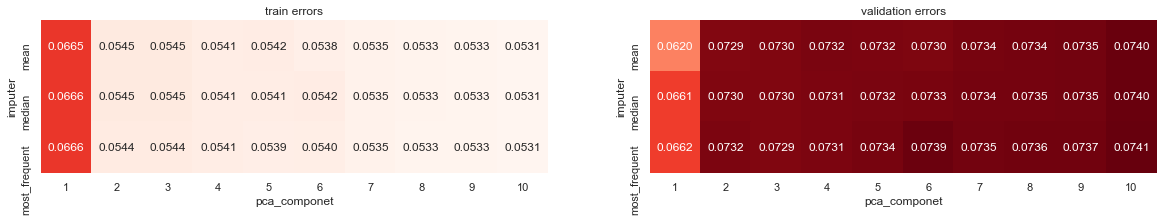

In [43]:
# Trực quan hóa kết quả
train_errs_df = pd.DataFrame(data=np.array(train_errs).reshape(len(imp_method), -1),
                             index=imp_method, columns=pca_component)
val_errs_df = pd.DataFrame(data=np.array(val_errs).reshape(len(imp_method), -1), 
                           index=imp_method, columns=pca_component)
min_err = min(min(train_errs), min(val_errs))
max_err = max(max(train_errs), max(val_errs))
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
sns.heatmap(train_errs_df, vmin=min_err, vmax=max_err, square=True, annot=True, 
            cbar=False, fmt='.4f', cmap='Reds')
plt.title('train errors'); plt.xlabel('pca_componet'); plt.ylabel('imputer')
plt.subplot(1, 2, 2)
sns.heatmap(val_errs_df, vmin=min_err, vmax=max_err, square=True, annot=True, 
            cbar=False, fmt='.4f', cmap='Reds')
plt.title('validation errors'); plt.xlabel('pca_componet'); plt.ylabel('imputer');

**Nhận xét**  
Nhóm sử dụng độ lỗi `mean_absolute_error` và kết quả tốt nhất mô hình trả về là **0.06**. Theo nhóm đánh giá thì phương pháp 1 này không có độ chính xác cao vì theo như dữ liệu gốc ban đầu: `humidity` có `std` vào khoảng **0.08** mà độ lỗi của mô hình dự đoán có `std` là **0.06** (khá gần với **0.08**)  

**Kế hoạch**   
Nhóm sẽ thực hiện phương pháp 2. Lần này, nhóm sẽ giữ nguyên toàn bộ các đặc trưng ban đầu, không thêm hay xóa bất kỳ cột nào. Quy trình làm vẫn tương tự như phương pháp 1 để xem kết quả có cải thiện hơn hay không

### b. Phương pháp 2

### c. Phương pháp 3
Nhóm nghĩ dùng 1 ngày để dự đoán ngày hôm sau sẽ không đủ nên sẽ dùng `k` ngày. Ở đây nhóm thử trường hợp `k = 7` và các đặc trưng sẽ giữ nguyên

In [44]:
k = 7
for i in range(k):
    title = "day_" + str(i + 1)
    humidity = data_df.humidity.copy().to_list()
    N = len(humidity)
    tp = [0] * (i + 1) + humidity[: N - i - 1]
    data_df[title] = pd.Series(tp, index=data_df.index)

In [45]:
data_df.head(10)

,time,temperature,apparentTemperature,dewPoint,humidity,pressure,windSpeed,windBearing,cloudCover,uvIndex,visibility,day_1,day_2,day_3,day_4,day_5,day_6,day_7
0,1262304000,73.45,75.07,72.69,0.97,1010.3,6.72,71.0,0.50,0.0,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,1262390400,71.67,72.95,69.81,0.94,1011.0,2.29,41.0,0.44,0.0,4.974,0.97,0.00,0.00,0.00,0.00,0.00,0.00
2,1262476800,75.25,76.89,73.39,0.94,1011.6,1.16,30.0,0.75,0.0,4.346,0.94,0.97,0.00,0.00,0.00,0.00,0.00
3,1262563200,75.25,76.64,71.61,0.88,1010.9,3.46,71.0,0.75,0.0,6.216,0.94,0.94,0.97,0.00,0.00,0.00,0.00
4,1262649600,75.25,76.89,73.39,0.94,1010.1,6.91,120.0,0.44,0.0,6.216,0.88,0.94,0.94,0.97,0.00,0.00,0.00
5,1262736000,73.45,74.65,69.81,0.88,1010.7,6.91,110.0,0.44,0.0,6.216,0.94,0.88,0.94,0.94,0.97,0.00,0.00
6,1262822400,71.67,72.95,69.81,0.94,1012.8,2.29,60.0,0.44,0.0,6.216,0.88,0.94,0.88,0.94,0.94,0.97,0.00
7,1262908800,71.67,73.23,71.61,1.00,1013.2,4.61,60.0,0.19,0.0,6.216,0.94,0.88,0.94,0.88,0.94,0.94,0.97
8,1262995200,73.45,75.18,73.39,1.00,1012.3,0.00,NaN,0.75,0.0,5.591,1.00,0.94,0.88,0.94,0.88,0.94,0.94
9,1263081600,75.25,76.64,71.61,0.88,1012.3,2.29,80.0,0.44,0.0,6.216,1.00,1.00,0.94,0.88,0.94,0.88,0.94


In [46]:
new_df = data_df.drop(index=list(range(k)))
new_df

,time,temperature,apparentTemperature,dewPoint,humidity,pressure,windSpeed,windBearing,cloudCover,uvIndex,visibility,day_1,day_2,day_3,day_4,day_5,day_6,day_7
7,1262908800,71.67,73.23,71.61,1.00,1013.2,4.61,60.0,0.19,0.0,6.216,0.94,0.88,0.94,0.88,0.94,0.94,0.97
8,1262995200,73.45,75.18,73.39,1.00,1012.3,0.00,NaN,0.75,0.0,5.591,1.00,0.94,0.88,0.94,0.88,0.94,0.94
9,1263081600,75.25,76.64,71.61,0.88,1012.3,2.29,80.0,0.44,0.0,6.216,1.00,1.00,0.94,0.88,0.94,0.88,0.94
10,1263168000,73.45,74.91,71.61,0.94,1012.6,3.46,90.0,0.19,0.0,6.216,0.88,1.00,1.00,0.94,0.88,0.94,0.88
11,1263254400,73.45,75.18,73.39,1.00,1013.5,4.61,80.0,0.44,0.0,6.216,0.94,0.88,1.00,1.00,0.94,0.88,0.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1324944000,71.67,72.95,69.81,0.94,1012.0,4.61,0.0,0.75,0.0,5.591,0.83,0.83,0.78,0.88,1.00,0.94,0.83
726,1325030400,73.45,75.18,73.39,1.00,1013.7,4.61,11.0,0.75,0.0,3.108,0.94,0.83,0.83,0.78,0.88,1.00,0.94
727,1325116800,71.67,72.44,66.21,0.83,1012.8,2.29,11.0,0.44,0.0,6.216,1.00,0.94,0.83,0.83,0.78,0.88,1.00
728,1325203200,73.45,74.65,69.81,0.88,1012.4,4.61,0.0,0.44,0.0,6.216,0.83,1.00,0.94,0.83,0.83,0.78,0.88


In [47]:
y_data_3 = new_df["humidity"].copy()
y_data_3 = y_data_3[1:]
y_data_3

8      1.00
9      0.88
10     0.94
11     1.00
12     1.00
       ... 
725    0.94
726    1.00
727    0.83
728    0.88
729    0.94
Name: humidity, Length: 722, dtype: float64

In [48]:
new_df = new_df.drop(index=729)
new_df

,time,temperature,apparentTemperature,dewPoint,humidity,pressure,windSpeed,windBearing,cloudCover,uvIndex,visibility,day_1,day_2,day_3,day_4,day_5,day_6,day_7
7,1262908800,71.67,73.23,71.61,1.00,1013.2,4.61,60.0,0.19,0.0,6.216,0.94,0.88,0.94,0.88,0.94,0.94,0.97
8,1262995200,73.45,75.18,73.39,1.00,1012.3,0.00,NaN,0.75,0.0,5.591,1.00,0.94,0.88,0.94,0.88,0.94,0.94
9,1263081600,75.25,76.64,71.61,0.88,1012.3,2.29,80.0,0.44,0.0,6.216,1.00,1.00,0.94,0.88,0.94,0.88,0.94
10,1263168000,73.45,74.91,71.61,0.94,1012.6,3.46,90.0,0.19,0.0,6.216,0.88,1.00,1.00,0.94,0.88,0.94,0.88
11,1263254400,73.45,75.18,73.39,1.00,1013.5,4.61,80.0,0.44,0.0,6.216,0.94,0.88,1.00,1.00,0.94,0.88,0.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,1324857600,66.27,66.48,60.80,0.83,1013.5,5.74,350.0,0.44,0.0,5.591,0.83,0.78,0.88,1.00,0.94,0.83,0.83
725,1324944000,71.67,72.95,69.81,0.94,1012.0,4.61,0.0,0.75,0.0,5.591,0.83,0.83,0.78,0.88,1.00,0.94,0.83
726,1325030400,73.45,75.18,73.39,1.00,1013.7,4.61,11.0,0.75,0.0,3.108,0.94,0.83,0.83,0.78,0.88,1.00,0.94
727,1325116800,71.67,72.44,66.21,0.83,1012.8,2.29,11.0,0.44,0.0,6.216,1.00,0.94,0.83,0.83,0.78,0.88,1.00


In [49]:
seed = 123
X_data_temp, X_data_val_3, y_data_temp, y_data_val_3 = train_test_split(new_df, y_data_3, test_size=0.2, random_state=seed)
X_data_train_3, X_data_test_3, y_data_train_3, y_data_test_3 = train_test_split(X_data_temp, y_data_temp, test_size=0.25, random_state=seed)
print(len(X_data_train_3), len(y_data_train_3))
print(len(X_data_val_3), len(y_data_val_3))
print(len(X_data_test_3), len(y_data_test_3))

432 432
145 145
145 145


In [50]:
pca_seed = 321
new_num_col = new_df.columns
num_col_imp = SimpleImputer(missing_values=np.nan, strategy='mean')
num_col_trans = ColumnTransformer(
    [("num_imp", SimpleImputer(), new_num_col)]
)
method_3 = Pipeline(
    steps=[
        ('colTrans', num_col_trans),
        ('stdScalar', StandardScaler()),
        ('PCA', PCA(random_state=pca_seed)),
        ('linear', LinearRegression())
    ]
)

In [51]:
imp_method = ['mean', 'median', 'most_frequent']
pca_component = list(range(len(new_df.columns)))
train_errs = []
val_errs = []
best_val_err = float('inf')
best_imp_method = None
best_PCA_component = None
for i in imp_method:
    for j in pca_component:
        method_1.set_params(colTrans__num_imp__strategy=i, PCA__n_components=j)
        model = method_3.fit(X_data_train_3, y_data_train_3)
        train_errs.append(mean_absolute_error(y_data_train_3, model.predict(X_data_train_3)))
        val_err = mean_absolute_error(y_data_val_3, model.predict(X_data_val_3))
        val_errs.append(val_err)
        y_pred_val = model.predict(X_data_val_3)
        y_data_val = y_data_val.sort_index()
        y_pred_val = pd.Series(y_pred_val, index=y_data_val_3.index)
        if val_err < best_val_err:
            best_val_err = val_err
            best_imp_method = i
            best_PCA_component = j + 1
"Finish"

'Finish'

In [52]:
print(best_val_err)
print(best_imp_method)
print(best_PCA_component)

0.05245218074688616
mean
1


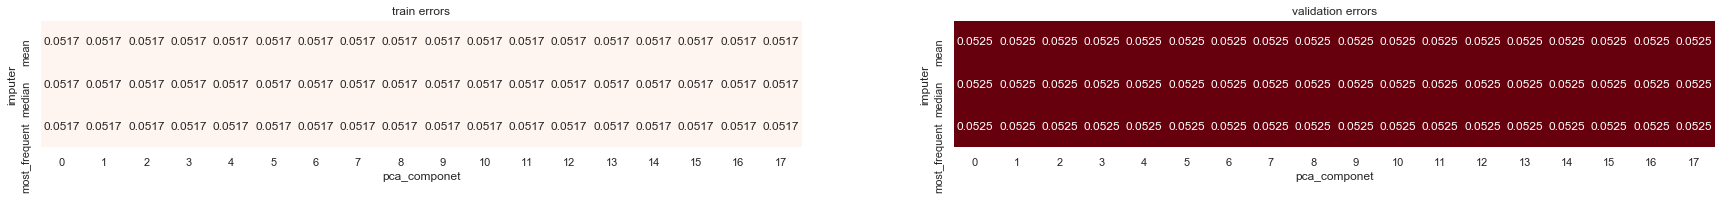

In [53]:
# Trực quan hóa kết quả
train_errs_df = pd.DataFrame(data=np.array(train_errs).reshape(len(imp_method), -1),
                             index=imp_method, columns=pca_component)
val_errs_df = pd.DataFrame(data=np.array(val_errs).reshape(len(imp_method), -1), 
                           index=imp_method, columns=pca_component)
min_err = min(min(train_errs), min(val_errs))
max_err = max(max(train_errs), max(val_errs))
plt.figure(figsize=(30, 30))
plt.subplot(1, 2, 1)
sns.heatmap(train_errs_df, vmin=min_err, vmax=max_err, square=True, annot=True, 
            cbar=False, fmt='.4f', cmap='Reds')
plt.title('train errors'); plt.xlabel('pca_componet'); plt.ylabel('imputer')
plt.subplot(1, 2, 2)
sns.heatmap(val_errs_df, vmin=min_err, vmax=max_err, square=True, annot=True, 
            cbar=False, fmt='.4f', cmap='Reds')
plt.title('validation errors'); plt.xlabel('pca_componet'); plt.ylabel('imputer');

**Nhận xét**  
Mô hình này cho kết quả có phần tốt hơn, nhóm cũng đã thử các `k` khác nhưng cũng không có khác biệt nên nhóm không trình bày ở đây